## Etude impact monstr 

Recherche d'un changement dans le cours de la partie avec la victoire sur un monste

In [1]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt

#Data need: golds

path_monstre = "../../Data/DataRaw/set_monsters.csv"
path_date = "../../Data/DataRework/set_addressDate.csv"
path_info = "../../Data/DataRaw/set_matchInfo.csv"
path_kills = "../../Data/DataRework/set_killsClassChamp.csv"



df_monstre = pd.read_csv(path_monstre)
df_date = pd.read_csv(path_date)
df_info = pd.read_csv(path_info)
df_kills = pd.read_csv(path_kills)


#Add date to structure
df_monstre = df_monstre.merge(right=df_date, right_on="Address", left_on="Address", how="left")
#df_monstre = df_monstre.merge(right=df_info[['rResult','Address']], right_on="Address",left_on="Address",how="left")

# Set the datetime columns
df_monstre.Date = pd.to_datetime(df_monstre.Date)
df_kills.Date = pd.to_datetime(df_kills.Date)



In [2]:
df_monstre.head()

,Address,Team,Time,Type,Date
0,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,37.267,DRAGON,2015-01-24
1,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,32.545,DRAGON,2015-01-24
2,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,26.177,DRAGON,2015-01-24
3,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,19.119,DRAGON,2015-01-24
4,http://matchhistory.na.leagueoflegends.com/en/...,bDragons,24.577,DRAGON,2015-01-25


In [3]:
df_date.head()

,Address,Date
0,http://matchhistory.na.leagueoflegends.com/en/...,1/24/2015
1,http://matchhistory.na.leagueoflegends.com/en/...,1/24/2015
2,http://matchhistory.na.leagueoflegends.com/en/...,1/25/2015
3,http://matchhistory.na.leagueoflegends.com/en/...,1/25/2015
4,http://matchhistory.na.leagueoflegends.com/en/...,1/25/2015


In [4]:
df_info.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,...,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,...,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,...,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,...,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,...,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...


In [5]:
df_kills.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Date,ChampionsKiller,PrimaryClass,SecondaryClass
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,ahri,Burst,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960,2015-01-24,jinx,Marksman,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889,2015-01-24,ahri,Burst,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895,2015-01-24,irelia,Diver,NaN
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643,2015-01-24,ahri,Burst,NaN


In [6]:
timeline = np.arange(0,51,1)

df_kills_temp = df_kills.drop(df_kills[df_kills.Time.isna()].index)
time_kills = df_kills_temp.Time
time_kills = time_kills.round(0)

df_monstre_temp = df_monstre.drop(df_monstre[df_monstre.Time.isna()].index)
time_monstre = df_monstre_temp.Time
time_monstre = time_monstre.round(0)


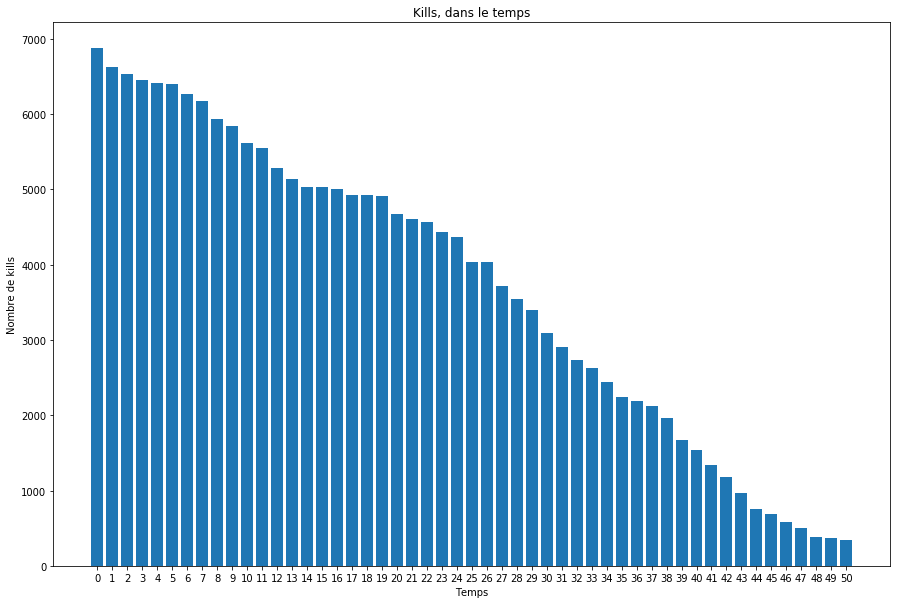

In [7]:

y = time_kills.value_counts()
y = y.reset_index()
y = y.sort_values(by="index")
y = y[y.index < 51 ]
x = timeline

plt.figure(figsize=(15,10))
plt.bar(y.index,y.Time)
plt.xticks(timeline)

plt.title("Kills, dans le temps")
plt.xlabel("Temps")
plt.ylabel("Nombre de kills")

plt.show()


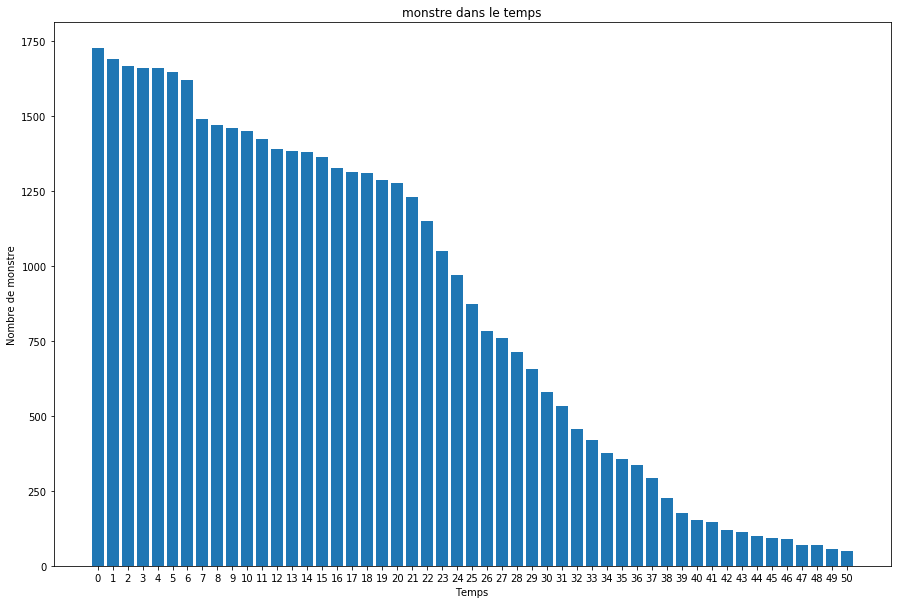

In [8]:

y = time_monstre.value_counts()
y = y.reset_index()
y = y.sort_values(by="index")
y = y[y.index < 51 ]
x = timeline

plt.figure(figsize=(15,10))
plt.bar(y.index,y.Time)
plt.xticks(timeline)

plt.title("monstre dans le temps")
plt.xlabel('Temps')
plt.ylabel('Nombre de monstre')


plt.show()


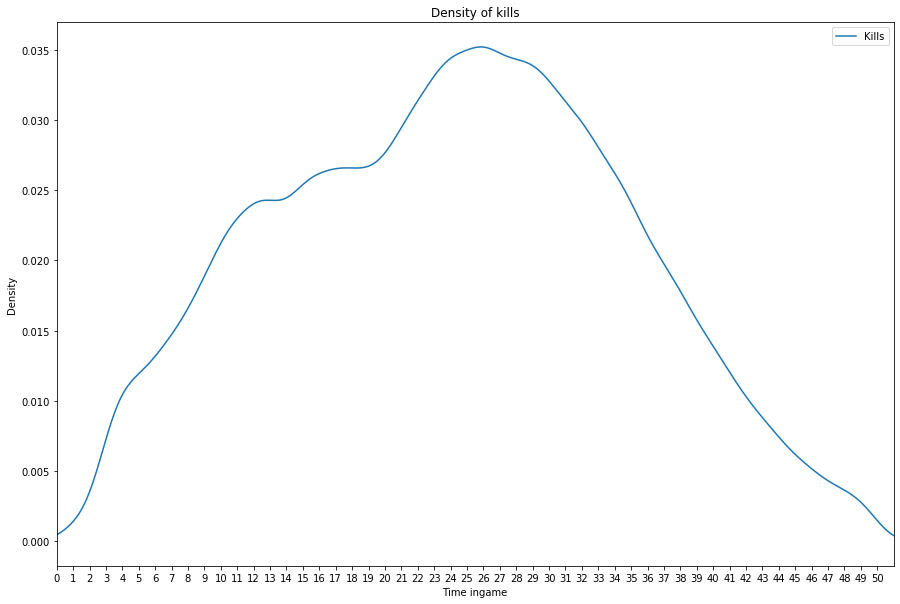

In [9]:

plt.figure(figsize=(15,10))

#ax = df_structure[(df_structure.Time > -1)&(df_structure.Time <= 50)].Time.plot.kde(label="Tours")
ax = df_kills_temp[(df_kills_temp.Time > -1)&(df_kills_temp.Time <= 50)].Time.plot.kde(label="Kills")

ax.set_xlim(0,51)

plt.xticks(np.arange(0,51,1))

plt.title("Density of kills")
plt.xlabel("Time ingame")
plt.legend()

plt.show()


In [10]:
df_monstre.Type.unique()

array(['DRAGON', 'EARTH_DRAGON', 'WATER_DRAGON', 'AIR_DRAGON',
       'FIRE_DRAGON', 'ELDER_DRAGON', 'BARON_NASHOR', 'RIFT_HERALD'],
      dtype=object)

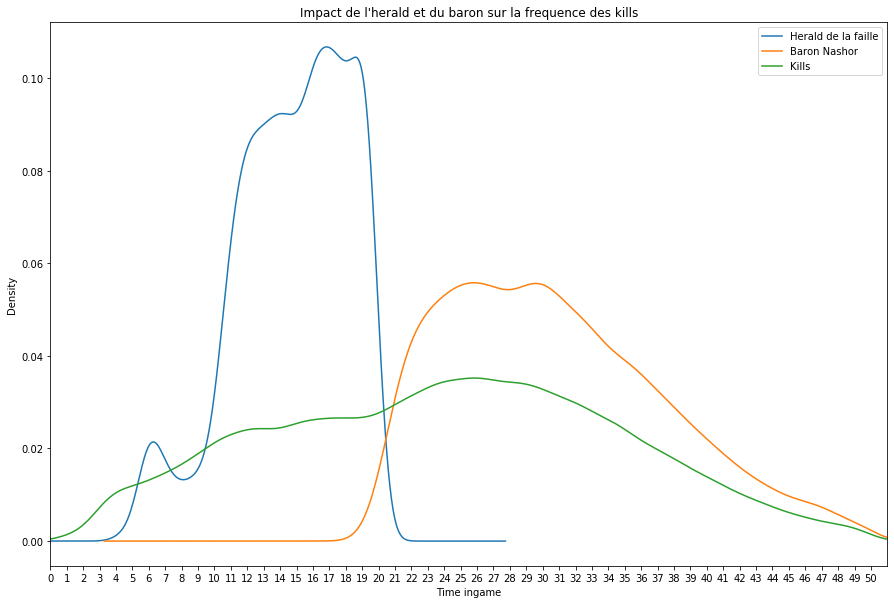

In [11]:

plt.figure(figsize=(15,10))

ax = df_monstre[(df_monstre.Time > -1)&(df_monstre.Time <= 50)&(df_monstre.Type == "RIFT_HERALD")].Time.plot.kde(label="Herald de la faille")
ax = df_monstre[(df_monstre.Time > -1)&(df_monstre.Time <= 50)&(df_monstre.Type == "BARON_NASHOR")].Time.plot.kde(label="Baron Nashor")

ax = df_kills_temp[(df_kills_temp.Time > -1)&(df_kills_temp.Time <= 50)].Time.plot.kde(label="Kills")

ax.set_xlim(0,51)

plt.xticks(np.arange(0,51,1))

plt.xlabel("Time ingame")

plt.title("Impact de l'herald et du baron sur la frequence des kills")
plt.legend()

plt.show()


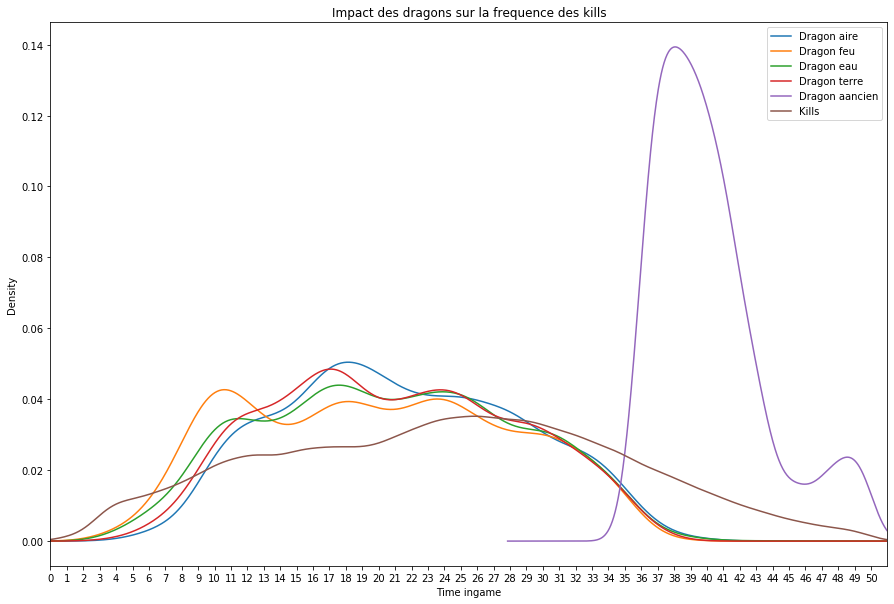

In [12]:

plt.figure(figsize=(15,10))

ax = df_monstre[(df_monstre.Time > -1)&(df_monstre.Time <= 50)&(df_monstre.Type == "AIR_DRAGON")].Time.plot.kde(label="Dragon aire")
ax = df_monstre[(df_monstre.Time > -1)&(df_monstre.Time <= 50)&(df_monstre.Type == "FIRE_DRAGON")].Time.plot.kde(label="Dragon feu")
ax = df_monstre[(df_monstre.Time > -1)&(df_monstre.Time <= 50)&(df_monstre.Type == "WATER_DRAGON")].Time.plot.kde(label="Dragon eau")
ax = df_monstre[(df_monstre.Time > -1)&(df_monstre.Time <= 50)&(df_monstre.Type == "EARTH_DRAGON")].Time.plot.kde(label="Dragon terre")
ax = df_monstre[(df_monstre.Time > -1)&(df_monstre.Time <= 50)&(df_monstre.Type == "ELDER_DRAGON")].Time.plot.kde(label="Dragon aancien")

ax = df_kills_temp[(df_kills_temp.Time > -1)&(df_kills_temp.Time <= 50)].Time.plot.kde(label="Kills")

ax.set_xlim(0,51)

plt.xticks(np.arange(0,51,1))

plt.xlabel("Time ingame")

plt.title("Impact des dragons sur la frequence des kills")
plt.legend()

plt.show()


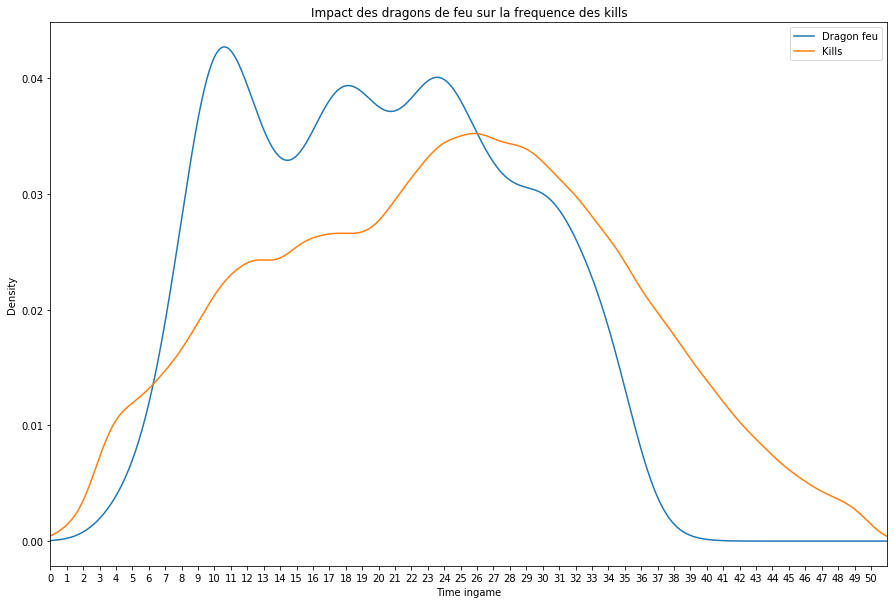

In [13]:


plt.figure(figsize=(15,10))

ax = df_monstre[(df_monstre.Time > -1)&(df_monstre.Time <= 50)&(df_monstre.Type == "FIRE_DRAGON")].Time.plot.kde(label="Dragon feu")

ax = df_kills_temp[(df_kills_temp.Time > -1)&(df_kills_temp.Time <= 50)].Time.plot.kde(label="Kills")

ax.set_xlim(0,51)

plt.xticks(np.arange(0,51,1))

plt.xlabel("Time ingame")

plt.title("Impact des dragons de feu sur la frequence des kills")
plt.legend()

plt.show()



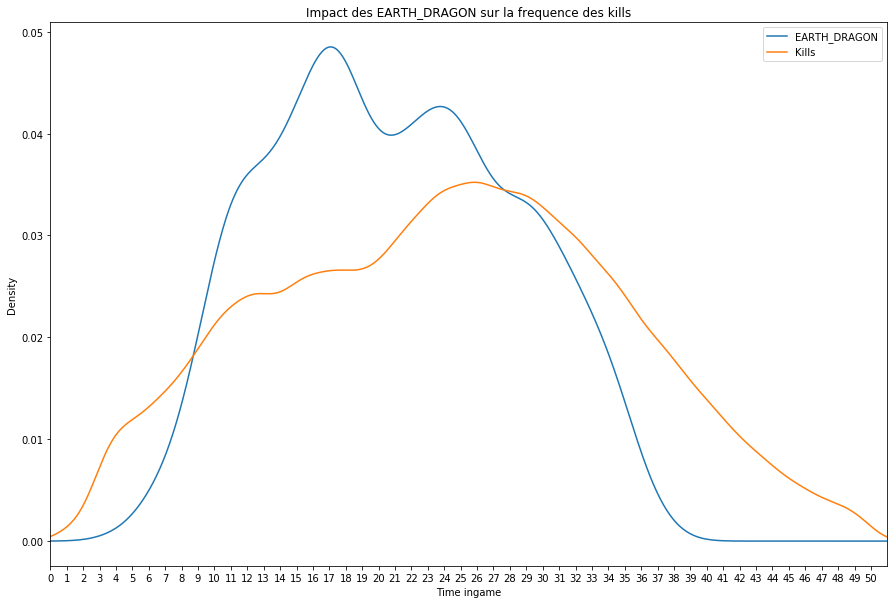

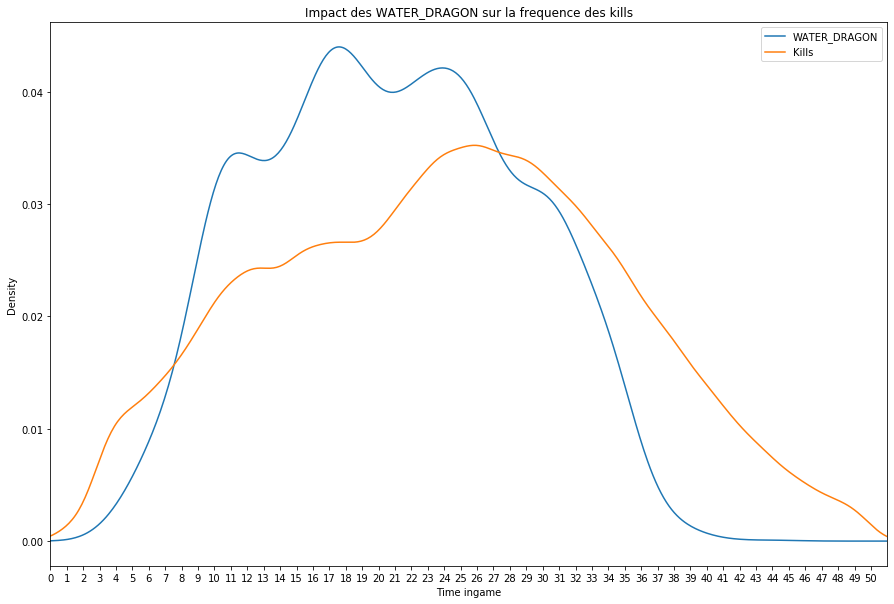

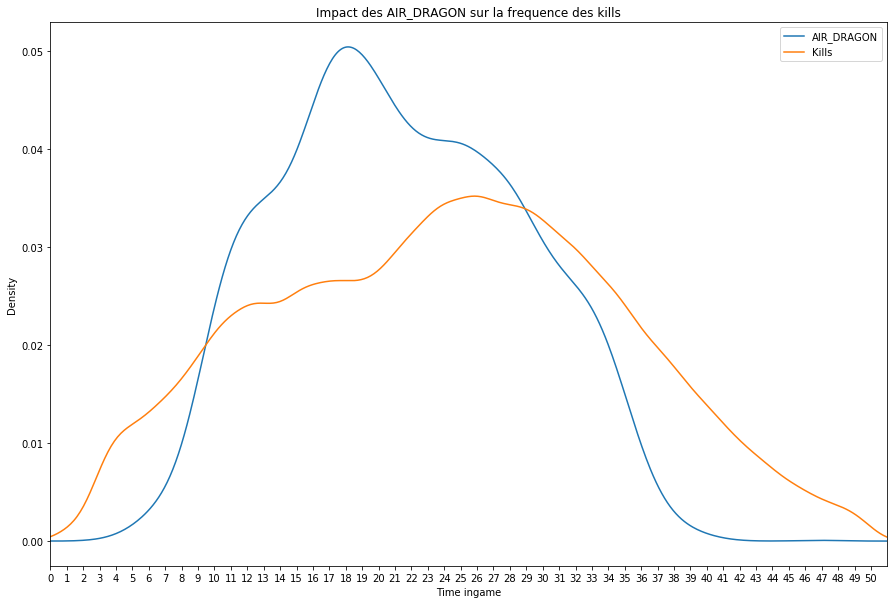

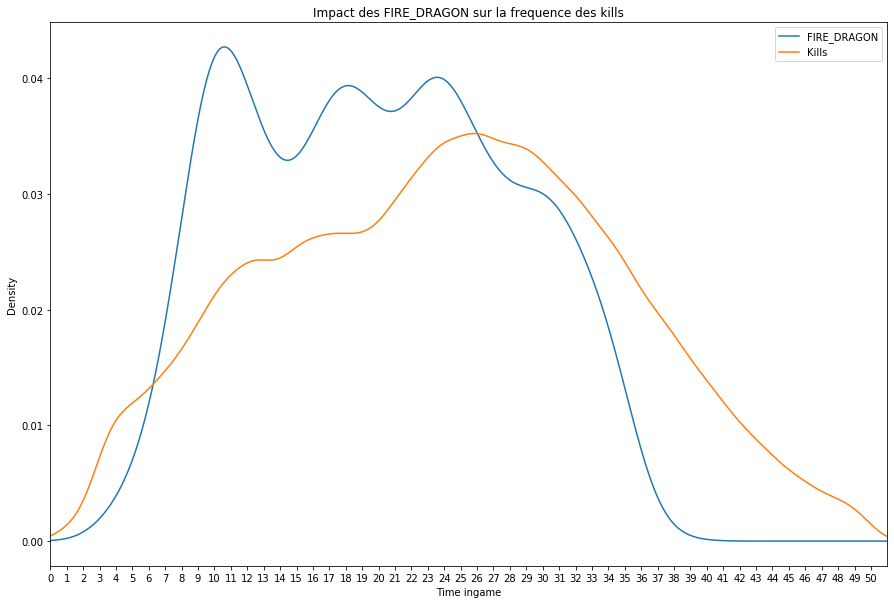

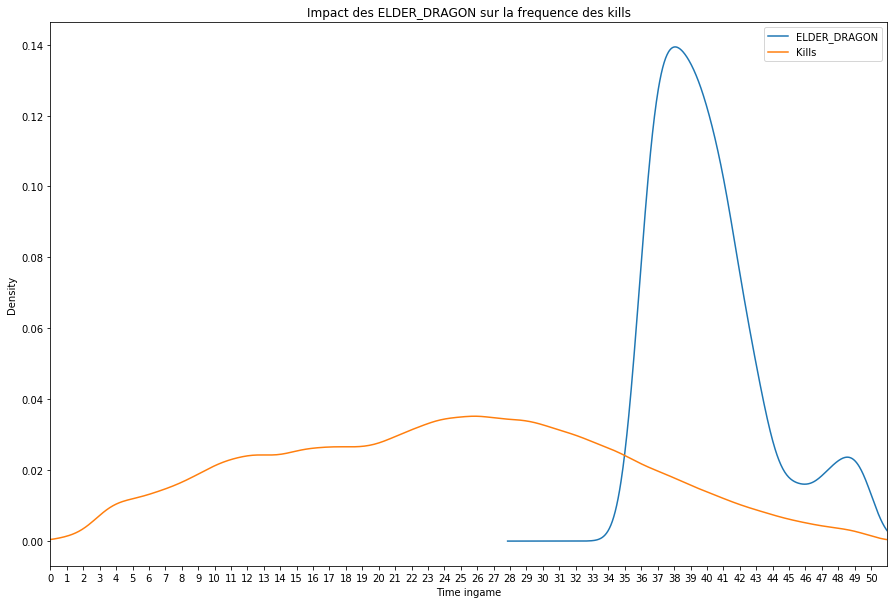

In [14]:
for i in ['EARTH_DRAGON', 'WATER_DRAGON', 'AIR_DRAGON', 'FIRE_DRAGON', 'ELDER_DRAGON']:
    
    plt.figure(figsize=(15,10))

    ax = df_monstre[(df_monstre.Time > -1)&(df_monstre.Time <= 50)&(df_monstre.Type == i)].Time.plot.kde(label=i)

    ax = df_kills_temp[(df_kills_temp.Time > -1)&(df_kills_temp.Time <= 50)].Time.plot.kde(label="Kills")

    ax.set_xlim(0,51)

    plt.xticks(np.arange(0,51,1))

    plt.xlabel("Time ingame")

    plt.title("Impact des {} sur la frequence des kills".format(i))
    plt.legend()

    plt.show()



In [15]:
df_monstre[df_monstre.Type == "RIFT_HERALD"].Date.dt.year.unique()

array([2016, 2017, 2015, 2018])

In [16]:
df_monstre[df_monstre.Type == "BARON_NASHOR"].Date.dt.year.unique()

array([2015, 2016, 2017, 2014, 2018])

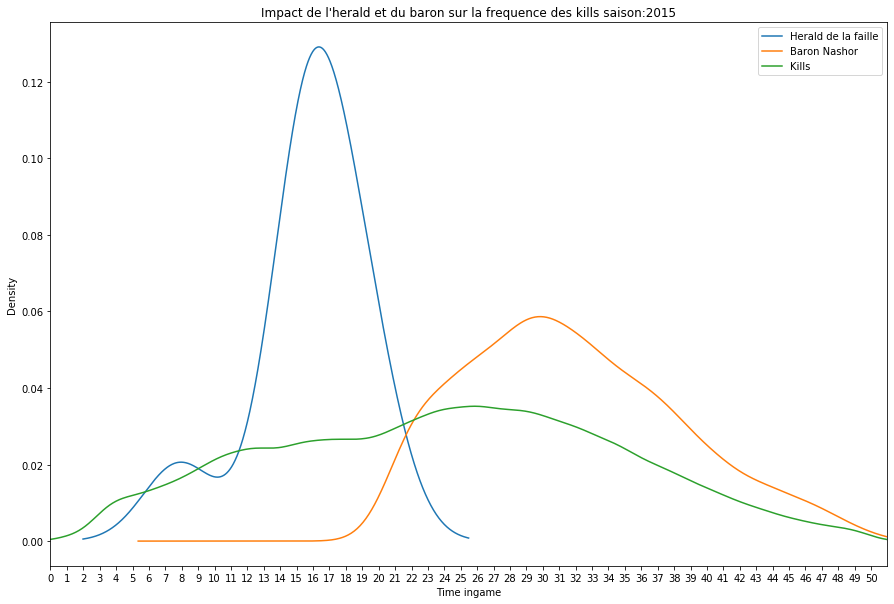

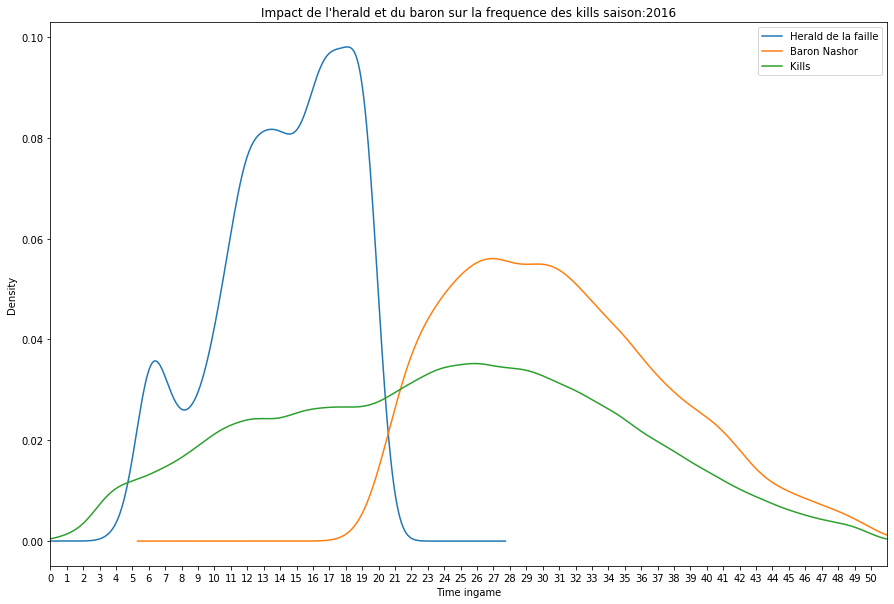

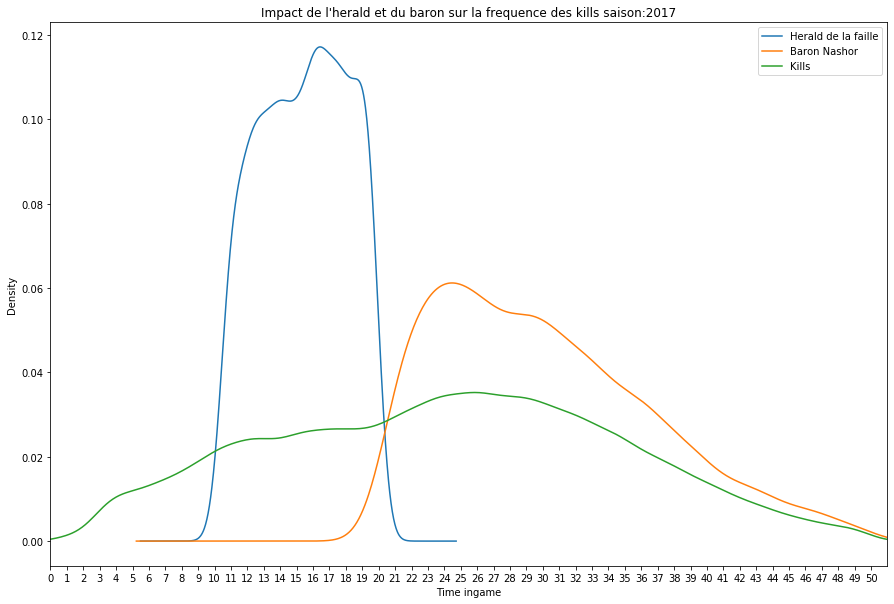

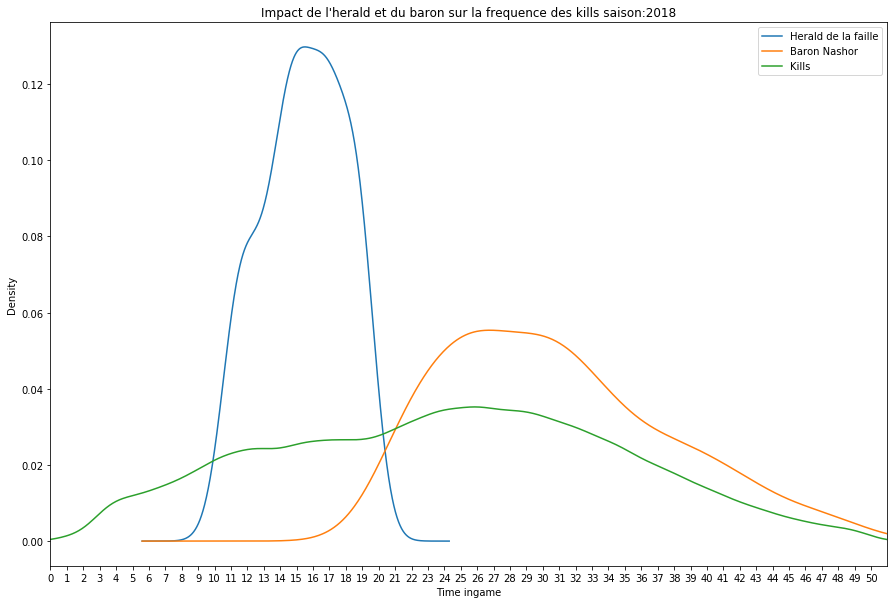

In [17]:
for i in [2015,2016,2017,2018]:
    
    plt.figure(figsize=(15,10))

    ax = df_monstre[(df_monstre.Time > -1)&(df_monstre.Time <= 50)&(df_monstre.Type == "RIFT_HERALD")&(df_monstre.Date.dt.year == i)].Time.plot.kde(label="Herald de la faille")
    ax = df_monstre[(df_monstre.Time > -1)&(df_monstre.Time <= 50)&(df_monstre.Type == "BARON_NASHOR")&(df_monstre.Date.dt.year == i)].Time.plot.kde(label="Baron Nashor")

    ax = df_kills_temp[(df_kills_temp.Time > -1)&(df_kills_temp.Time <= 50)].Time.plot.kde(label="Kills")

    ax.set_xlim(0,51)

    plt.xticks(np.arange(0,51,1))

    plt.xlabel("Time ingame")

    plt.title("Impact de l'herald et du baron sur la frequence des kills saison:{}".format(i))
    plt.legend()

    plt.show()


In [18]:
df_monstre[df_monstre.Type == "AIR_DRAGON"].Date.dt.year.unique()

array([2016, 2017, 2018])

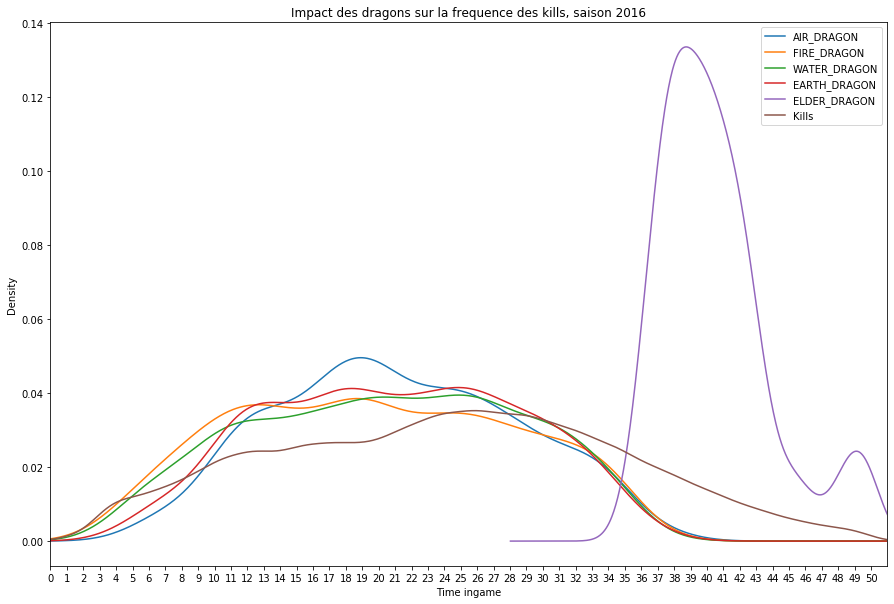

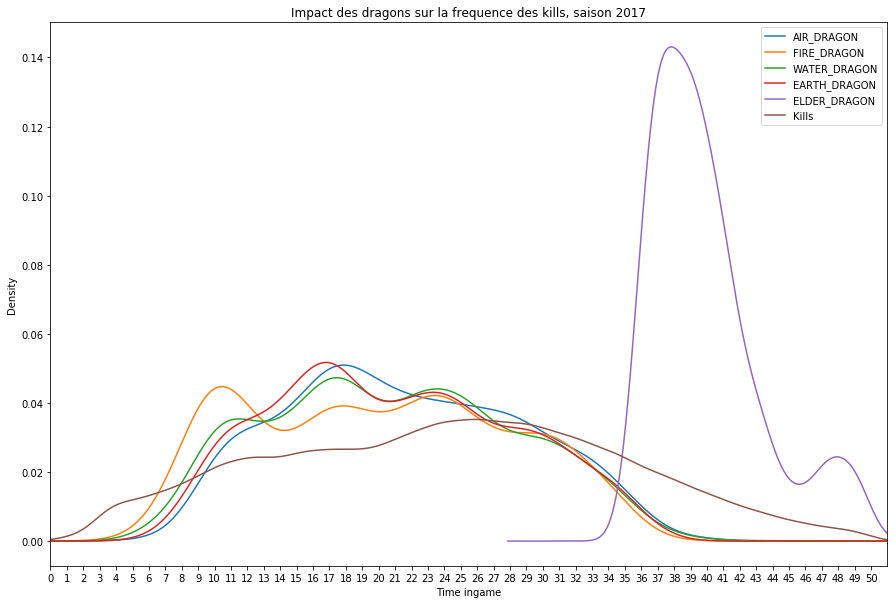

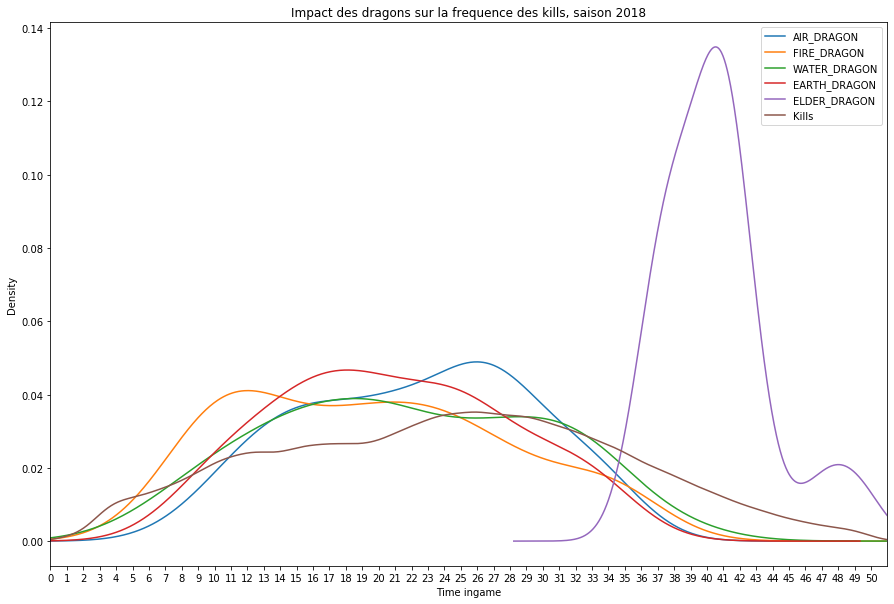

In [19]:
for i in [2016,2017,2018]:
    
    plt.figure(figsize=(15,10))
    
    for j in ["AIR_DRAGON","FIRE_DRAGON","WATER_DRAGON","EARTH_DRAGON","ELDER_DRAGON"]:
        ax = df_monstre[(df_monstre.Time > -1) & (df_monstre.Time <= 50) & (df_monstre.Type == j) & (df_monstre.Date.dt.year == i)].Time.plot.kde(label="{}".format(j))

    ax = df_kills_temp[(df_kills_temp.Time > -1) & (df_kills_temp.Time <= 50)].Time.plot.kde(label="Kills")

    ax.set_xlim(0,51)

    plt.xticks(np.arange(0,51,1))

    plt.xlabel("Time ingame")

    plt.title("Impact des dragons sur la frequence des kills, saison {}".format(i))
    plt.legend()

    plt.show()


In [20]:
#Impact sur le gain d'or